<a href="https://colab.research.google.com/github/jtao22/PHYS-XR050/blob/main/lab4/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import cm
import seaborn as sns
from  scipy.stats  import  f_oneway as f1
%matplotlib inline
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import files
files.upload()

Saving data.csv to data (2).csv


{'data.csv': b'symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price\r\n3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495\r\n3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,16500\r\n1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154,5000,19,26,16500\r\n2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102,5500,24,30,13950\r\n2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8,115,5500,18,22,17450\r\n2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,1

In [ ]:
df = pd.read_csv('data.csv')
data = df.copy()

In [ ]:
data.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [ ]:
data.replace("?", np.nan, inplace = True)

avg = data["normalized-losses"].astype("float").mean(axis=0) 
data["normalized-losses"].replace(np.nan, avg, inplace=True)

avg = data['bore'].astype('float').mean(axis=0)
data["bore"].replace(np.nan, avg, inplace=True)

avg = data["stroke"].astype("float").mean(axis = 0)
data["stroke"].replace(np.nan, avg, inplace = True)

avg = data['horsepower'].astype('float').mean(axis=0)
data['horsepower'].replace(np.nan, avg, inplace=True)

avg = data['peak-rpm'].astype('float').mean(axis=0)
data['peak-rpm'].replace(np.nan, avg, inplace=True)

data['num-of-doors'].value_counts().idxmax()
data["num-of-doors"].replace(np.nan, "four", inplace=True)

data.dropna(subset=["price"], axis=0, inplace=True)

data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [ ]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
data[['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']] = data[['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']].astype('float')
data['normalized-losses'] = data['normalized-losses'].astype('int')
data.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [ ]:
bins = ([data['price'].min(),20000., data['price'].max()])
bins = np.array(bins)
names = ['<20k', '>=20k']
data['price-range'] = pd.cut(data['price'], bins, labels=names, include_lowest=True )
print(data['price-range'].value_counts())
over = 0
under = 0
for i in data['price']:
  if (i >= 20000):
    over = over+1
  else:
    under = under+1
print(under, over)

<20k     176
>=20k     25
Name: price-range, dtype: int64
176 25


In [ ]:
data['price-range'].dtypes

CategoricalDtype(categories=['<20k', '>=20k'], ordered=True)

In [ ]:
data = data.drop(columns=['aspiration','engine-type','engine-location','fuel-system','make'],axis=1)
data

,symboling,normalized-losses,fuel-type,num-of-doors,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price-range
0,3,122,gas,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,<20k
1,3,122,gas,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,<20k
2,1,122,gas,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,<20k
3,2,164,gas,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,<20k
4,2,164,gas,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,<20k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,gas,four,sedan,rwd,109.1,188.8,68.9,55.5,2952,four,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,<20k
201,-1,95,gas,four,sedan,rwd,109.1,188.8,68.8,55.5,3049,four,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,<20k
202,-1,95,gas,four,sedan,rwd,109.1,188.8,68.9,55.5,3012,six,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,>=20k
203,-1,95,diesel,four,sedan,rwd,109.1,188.8,68.9,55.5,3217,six,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,>=20k


In [ ]:
data['num-of-cylinders'].value_counts()

four      157
six        24
five       10
two         4
eight       4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

In [ ]:
data["num-of-cylinders"].replace("four", 4, inplace=True)
data["num-of-cylinders"].replace("six", 6, inplace=True)
data["num-of-cylinders"].replace("five", 5, inplace=True)
data["num-of-cylinders"].replace("two", 2, inplace=True)
data["num-of-cylinders"].replace("eight", 8, inplace=True)
data["num-of-cylinders"].replace("three", 3, inplace=True)
data["num-of-cylinders"].replace("twelve", 12, inplace=True)
data['num-of-cylinders'].value_counts()

4     157
6      24
5      10
8       4
2       4
12      1
3       1
Name: num-of-cylinders, dtype: int64

In [ ]:
corr = data.corr(method='pearson')
corr

NameError: ignored

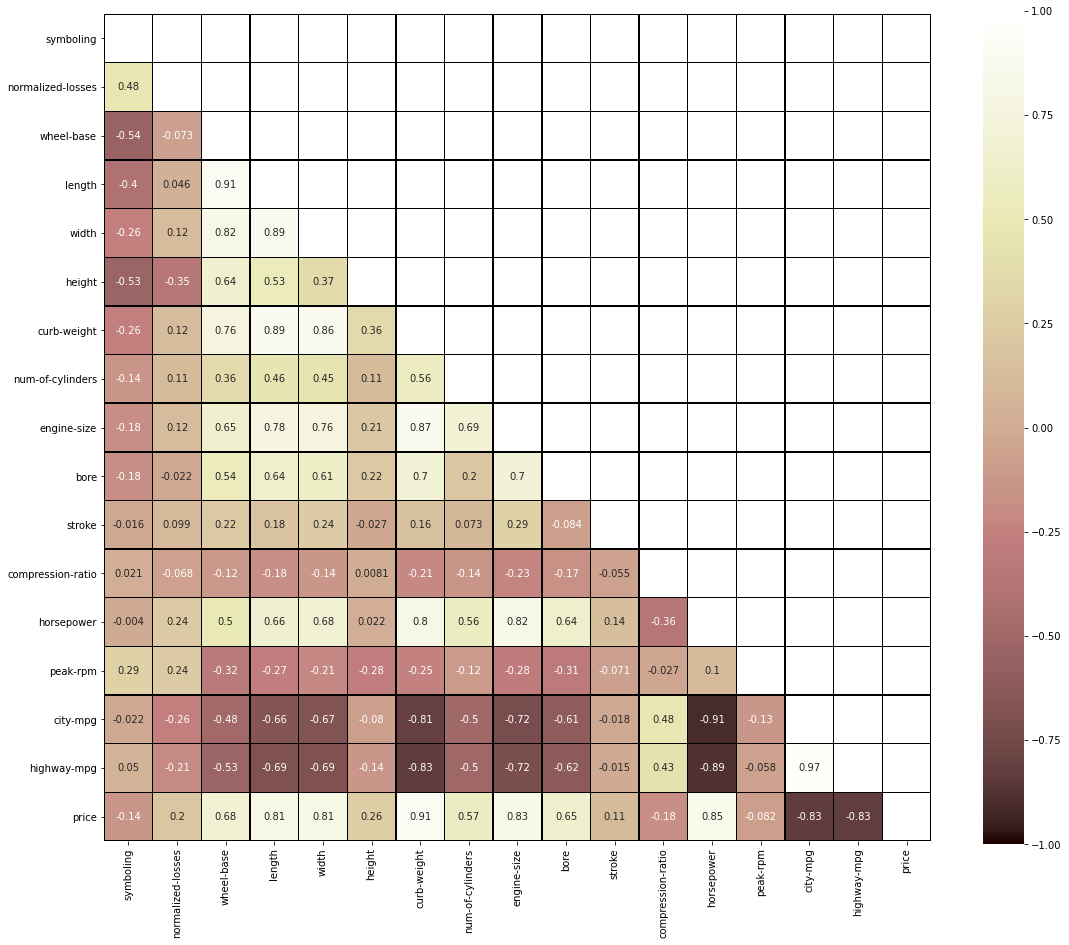

In [ ]:
fig = plt.figure(figsize=(16,16))
plot = fig.add_subplot(1,1,1)
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, annot = True, 
            vmin=-1, vmax=1, center= 0, 
            cmap= cm.pink,
            linewidths=0.5, linecolor='black',
            square=True, mask = mask, 
            cbar_kws={"shrink": .75})
plt.tight_layout()

In [ ]:
corr["price"] .sort_values(ascending=False)

price                1.000000
curb-weight          0.913767
horsepower           0.849142
engine-size          0.828417
width                0.812097
length               0.810331
wheel-base           0.681790
bore                 0.645943
num-of-cylinders     0.574757
height               0.263806
normalized-losses    0.202034
stroke               0.112829
peak-rpm            -0.081912
symboling           -0.142683
compression-ratio   -0.177579
highway-mpg         -0.827265
city-mpg            -0.831284
Name: price, dtype: float64

In [ ]:
data = data.drop(columns=['height','normalized-losses','stroke','peak-rpm','symboling','compression-ratio'],axis=1)
data

,fuel-type,num-of-doors,body-style,drive-wheels,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,price,price-range
0,gas,two,convertible,rwd,88.6,168.8,64.1,2548,4,130,3.47,111.0,21,27,13495.0,<20k
1,gas,two,convertible,rwd,88.6,168.8,64.1,2548,4,130,3.47,111.0,21,27,16500.0,<20k
2,gas,two,hatchback,rwd,94.5,171.2,65.5,2823,6,152,2.68,154.0,19,26,16500.0,<20k
3,gas,four,sedan,fwd,99.8,176.6,66.2,2337,4,109,3.19,102.0,24,30,13950.0,<20k
4,gas,four,sedan,4wd,99.4,176.6,66.4,2824,5,136,3.19,115.0,18,22,17450.0,<20k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,four,sedan,rwd,109.1,188.8,68.9,2952,4,141,3.78,114.0,23,28,16845.0,<20k
201,gas,four,sedan,rwd,109.1,188.8,68.8,3049,4,141,3.78,160.0,19,25,19045.0,<20k
202,gas,four,sedan,rwd,109.1,188.8,68.9,3012,6,173,3.58,134.0,18,23,21485.0,>=20k
203,diesel,four,sedan,rwd,109.1,188.8,68.9,3217,6,145,3.01,106.0,26,27,22470.0,>=20k


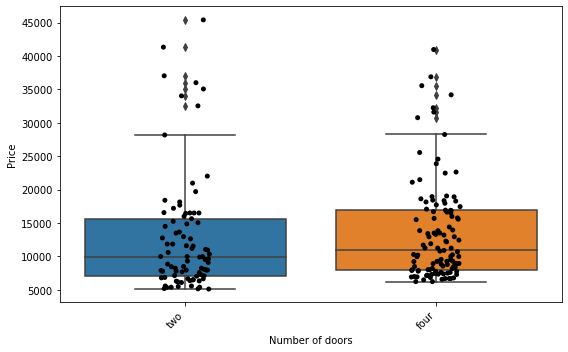

In [ ]:
fig = plt.figure(figsize=(8,5))
newplot = fig.add_subplot(1,1,1)
sns.boxplot(x=data['num-of-doors'], y = data['price'], ax = newplot)
sns.stripplot(x=data['num-of-doors'], y = data['price'],size=5, color="black")
newplot.set_xlabel("Number of doors")
newplot.set_ylabel("Price")
plt.xticks(rotation=45,ha="right")
fig.tight_layout()

In [ ]:
group = data[['num-of-doors','price']].groupby(['num-of-doors'])
group.head() 

,num-of-doors,price
0,two,13495.0
1,two,16500.0
2,two,16500.0
3,four,13950.0
4,four,17450.0
5,two,15250.0
6,four,17710.0
7,four,18920.0
8,four,23875.0
10,two,16430.0


In [ ]:
f, p = f1(group.get_group('two')['price'],group.get_group('four')['price'])
print( "ANOVA  results: F=", f , ", p-value =", p)

ANOVA  results: F= 0.3589973711707057 , p-value = 0.5497450927348373


In [ ]:
data.drop('num-of-doors',axis=1,inplace=True)

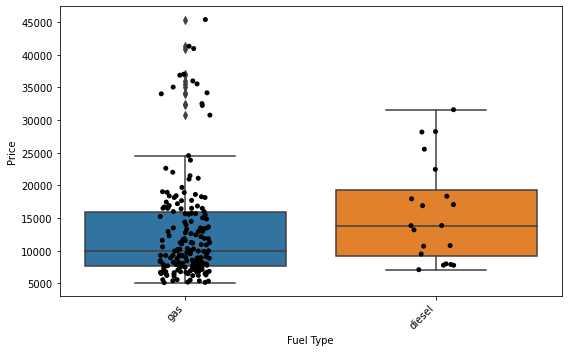

In [ ]:
fig = plt.figure(figsize=(8,5))
newplot = fig.add_subplot(1,1,1)
sns.boxplot(x=data['fuel-type'], y = data['price'], ax = newplot)
sns.stripplot(x=data['fuel-type'], y = data['price'],size=5, color="black")
newplot.set_xlabel("Fuel Type")
newplot.set_ylabel("Price")
plt.xticks(rotation=45,ha="right")
fig.tight_layout()

In [ ]:
group = data[['fuel-type','price']].groupby(['fuel-type'])
group.head()

,fuel-type,price
0,gas,13495.0
1,gas,16500.0
2,gas,16500.0
3,gas,13950.0
4,gas,17450.0
63,diesel,10795.0
66,diesel,18344.0
67,diesel,25552.0
68,diesel,28248.0
69,diesel,28176.0


In [ ]:
f, p = f1(group.get_group('gas')['price'],group.get_group('diesel')['price'])
print( "ANOVA  results: F=", f , ", p-value =", p)

ANOVA  results: F= 2.4520196354787864 , p-value = 0.11896254438091516


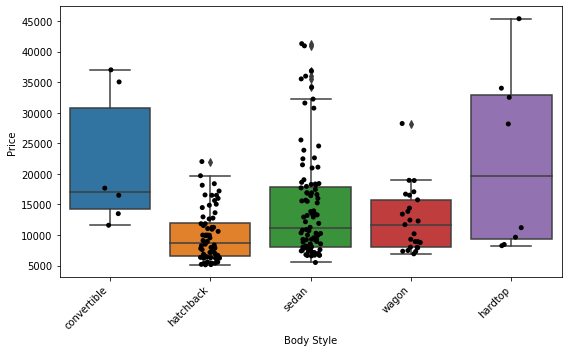

In [ ]:
fig = plt.figure(figsize=(8,5))
newplot = fig.add_subplot(1,1,1)
sns.boxplot(x=data['body-style'], y = data['price'], ax = newplot)
sns.stripplot(x=data['body-style'], y = data['price'],size=5, color="black")
newplot.set_xlabel("Body Style")
newplot.set_ylabel("Price")
plt.xticks(rotation=45,ha="right")
fig.tight_layout()

In [ ]:
group = data[['body-style','price']].groupby(['body-style'])
group.head()

,body-style,price
0,convertible,13495.0
1,convertible,16500.0
2,hatchback,16500.0
3,sedan,13950.0
4,sedan,17450.0
5,sedan,15250.0
6,sedan,17710.0
7,wagon,18920.0
8,sedan,23875.0
18,hatchback,5151.0


In [ ]:
f, p = f1(group.get_group('convertible')['price'], group.get_group('hatchback')['price'], group.get_group('sedan')['price'], group.get_group('wagon')['price'], group.get_group('hardtop')['price'])
print( "ANOVA  results: F=", f , ", p-value =", p)

ANOVA  results: F= 9.12875185470821 , p-value = 8.779795237614595e-07


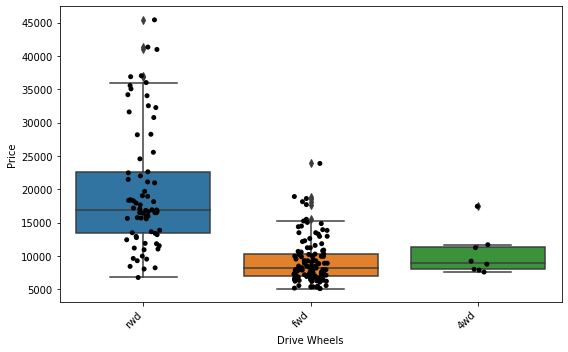

In [ ]:
fig = plt.figure(figsize=(8,5))
newplot = fig.add_subplot(1,1,1)
sns.boxplot(x=data['drive-wheels'], y = data['price'], ax = newplot)
sns.stripplot(x=data['drive-wheels'], y = data['price'],size=5, color="black")
newplot.set_xlabel("Drive Wheels")
newplot.set_ylabel("Price")
plt.xticks(rotation=45,ha="right")
fig.tight_layout()

In [ ]:
group = data[['drive-wheels','price']].groupby(['drive-wheels'])
group.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
10,rwd,16430.0


In [ ]:
f, p = f1(group.get_group('rwd')['price'],group.get_group('fwd')['price'],group.get_group('4wd')['price'])
print( "ANOVA  results: F=", f , ", p-value =", p)

ANOVA  results: F= 67.95406500780398 , p-value = 3.3945443577151245e-23


###Results
| Column/feature | F | p-value |
| --- | --- | --- |
| fuel-type |  2.452 | 0.119 |
| body-style | 9.129 | 8.780e-07 |
| drive-wheels | 67.954 | 3.395e-23 |

In [ ]:
#it appears that fuel type is the only bad indicator of price
data.drop('fuel-type',axis=1,inplace=True)

In [ ]:
dv1 = pd.get_dummies(data['drive-wheels'])
dv1.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In [ ]:
dv2 = pd.get_dummies(data['body-style'])
dv2.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [ ]:
data = pd.concat([data, dv1,dv2], axis=1)
data = data.drop(columns=['body-style','drive-wheels'], axis=1)
data.head()

,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,price,price-range,4wd,fwd,rwd,convertible,hardtop,hatchback,sedan,wagon
0,88.6,168.8,64.1,2548,4,130,3.47,111.0,21,27,13495.0,<20k,0,0,1,1,0,0,0,0
1,88.6,168.8,64.1,2548,4,130,3.47,111.0,21,27,16500.0,<20k,0,0,1,1,0,0,0,0
2,94.5,171.2,65.5,2823,6,152,2.68,154.0,19,26,16500.0,<20k,0,0,1,0,0,1,0,0
3,99.8,176.6,66.2,2337,4,109,3.19,102.0,24,30,13950.0,<20k,0,1,0,0,0,0,1,0
4,99.4,176.6,66.4,2824,5,136,3.19,115.0,18,22,17450.0,<20k,1,0,0,0,0,0,1,0


In [ ]:
data = data.drop(columns=['price-range'], axis=1)

In [ ]:
for col in data:
  data[col] = (data[col]-data[col].mean())/data[col].std()

In [ ]:
data.head()

,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,price,4wd,fwd,rwd,convertible,hardtop,hatchback,sedan,wagon
0,-1.680910,-0.438315,-0.851335,-0.014821,-0.342804,0.075201,0.519668,0.203247,-0.650624,-0.540937,0.036224,-0.203088,-1.189375,1.292920,5.686678,-0.203088,-0.713256,-0.934951,-0.37595
1,-1.680910,-0.438315,-0.851335,-0.014821,-0.342804,0.075201,0.519668,0.203247,-0.650624,-0.540937,0.414350,-0.203088,-1.189375,1.292920,5.686678,-0.203088,-0.713256,-0.934951,-0.37595
2,-0.708334,-0.243544,-0.185134,0.516789,1.544965,0.604724,-2.427303,1.354035,-0.961995,-0.687669,0.414350,-0.203088,-1.189375,1.292920,-0.174975,-0.203088,1.395045,-0.934951,-0.37595
3,0.165335,0.194690,0.147966,-0.422710,-0.342804,-0.430252,-0.524828,-0.037616,-0.183569,-0.100741,0.093477,-0.203088,0.836595,-0.769595,-0.174975,-0.203088,-0.713256,1.064253,-0.37595
4,0.099398,0.194690,0.243137,0.518722,0.601081,0.219617,-0.524828,0.310297,-1.117680,-1.274597,0.533891,4.899487,-1.189375,-0.769595,-0.174975,-0.203088,-0.713256,1.064253,-0.37595


In [ ]:
print(data['price'].mean(), data['price'].std())

-7.070076972737315e-17 1.0000000000000004


this is truncation error.

In [ ]:
print(int(data['price'].mean()), int(data['price'].std()))

0 1


exactly what we were aiming for !